

## Normalización de las variables o características

Discutimos previamente que la magnitud o rango de valores en una variable o característica es un factor importante que debemos tener en cuenta cuando estamos construyendo modelos de aprendizaje de máquina o machine learning. 

Brevemente:

### La magnitud de las variables importa porque:

- Los coeficientes de regresión de los modelos lineales están influenciados directamente por la magnitud de las variables
- Las variables con mayor escala / mayor rango de valores dominan sobre aquellas con escala más pequeña / menor rango de valores .
- El descenso por gradiente convergerá mucho más rápido si todas las variables tienen rangos de valores similares.
- El escalamiento de las variables ayuda a reducir el tiempo para encontrar los vectores de soporte en las Máquinas de vectores de soporte (SVMs) 
- De igual forma, muchos de los algoritmos usan medidas de distancia entre dos puntos - por ejemplo la distancia euclidiana, KNeighbors or SVMs-  y son sensibles a la escala de las variables. Si una de las variables tiene valores grandes, entonces la distancia será influenciada de gran manera por esta variable. 
- Algunos algoritmos, como el Análisis de Componentes Principales - PCA  requieren que las variables estén centradas alrededor de 0.
- Las redes neuronales dan diferente importancia a una característica o a otra en función de la escala que tengan sus valores (además de poder suponer otras dificultades al entrenamiento)

### Los modelos de machine learning que se ven afectados por la escala de las variables son:

- Regresión Lineal y Logística 
- Redes Neuronales
- Máquinas de vectores de soporte (SVMs)
- K vecinos más cercanos (KNN o KNeighbors)
- Agrupamiento K-medias
- Análisis discriminante lineal (LDA)
- Análisis de Componentes Principales (PCA)


### Normalización de las variables


Discutimos previamente que para mejorar el desempeño de muchos algoritmos de Machine Learning, es necesario normalizar las variables de entrada al algoritmo **antes del entrenamiento del modelo **.

El escalamiento de las variables es un paso importante del pre-procesamiento de datos. Las variables pueden tener cualquier valor con diferentes escalas, y el normalizar permite estandarizar estos rangos de valores independientes.
 
Por lo tanto **normalizar**, en este contexto, significa comprimir o extender los valores de una variable para que estén en un rango definido. 

Hay varios métodos de normalización , las cuales discutiremos en esta sección: 

- Escalamiento estándar (Standard Scaler)
- Escalamiento por la media 
- Escalamiento por valores mínimo y máximo - MinMaxScaling
- Escalamiento por valor máximo - MaxAbsScaling
- Escalamiento por cuantiles y mediana - RobustScaling
- Normalización vector unitario


En este notebook discutimos el **Normalización por la media **.

=================================================================

## Escalamiento por la media 

Normalización por la media implica centrar las variables alrededor de zero, y re-escalar el rango de valores.
En este procedimiento a cada observación se le resta la media de la variable y luego se divide por la diferencia entre los valores máximo y mínimo:

**x_escalado = (x - x_media) / ( x_max - x_min)**

El resultado de la transformación es una distribución centrada alrededor de zero y con sus valores mínimo y máximo en el rango de -1 a 1. La forma de la distribución normalizada será muy similar a la original, pero la varianza puede que cambie y por lo tanto no es identical.

Nuevamente, esta técnica no **normaliza la distribución de los datos** por lo tanto si es el resultado esperado, es necesario implementar cualquiera de las técnicas que discutimos en la sección 7 del curso.

Para resumir, la normalización por la media:

- centraliza la media alrededor de 0
- la varianza es diferente
- puede alterar la forma de la distribución original 
- los valores mínimos y máximos de la variable se restringe al rango entre -1 and 1.
- preserva los valores extremos

Este tipo de escalamiento es apropiada para los algoritmos que requieren las variables centradas alrededor de cero.

## En este demo

Aprenderás cómo normalizar las variables por la media  utilizando los datos del Boston House Prices (Precio de casas en Boston) disponible en Scikit-learn

No hay un transformador en Scikit-learn para esta normalización, pero podemos implementarla utilizando una combinación de otros dos transformadores que discutiremos en detalles en dos secciones más adelante. También la implementaremos manualmente con pandas.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# conjunto de datos para el demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# clase para estandarización por la media
from sklearn.preprocessing import StandardScaler, RobustScaler


In [17]:
# cargar datos del Boston House price de sklearn
boston_dataset = load_boston()

# crea un dataframe con las variables independientes
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# añadir la variable target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
# Información acerca del conjunto de datos
# Boston House Prices: Precios de casas en Boston

# El objectivo es predecir 
# "el valor mediano de las casas en Boston" 
# esta es la columna MEDV en los datos

# el resto de las variables representan características
# acerca de las casas y de los vencidarios

#imprimir la descripción de los datos
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# Miremos los pamámetros estadísticos principales de cada
# variable para darnos una idea del rango de valores

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Diferentes variables tienen diferentes rangos de valores representados por la media (mean), max, min y desviación estandar, etc. En otras palabras, tienen diferentes magnitudes o escalas. Pon atención como en este demo, **los valores promedio no están centrados alrededor de zero y los valores máximos y mínimos varían en rangos grandes**


Cuando estandarizamos el conjunto de datos, primero necesitamos indentificar la media y los valores máximos y mínimos de las variables. Estos parámetros necesitan ser aprendidos en el set de entrenamiento, guardados y luego usados para escalar el set de prueba y cualquier datos futuros. Por lo tanto, primero dividiremos los datos en los sets de entrenamiento y prueba, como hemos hecho a lo largo del curso.


In [20]:
# separemos los datos en los sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

### Normalización por la media con pandas

In [21]:
# primero, estimemos la media del set de entrenamiento

means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [22]:
# ahora estimemos los valores  min y max, y su rango 
# usnado el set the entrenamiento

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [23]:
# ahora tenemos todos los parámetros para 
# la normalización:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [24]:
# miremos el set de entrenamiento original:
# en particular la media y valores min/max  
# Aqui usamos np.round para reducir el número 
# de decimalaes a 1 

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [25]:
# miremos el set de entrenamiento normalizado:
# media y valores min/max  
# Aqui usamos np.round para reducir el número 
# de decimalaes a 1 


np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


Como era de esperarse, la media de cada variable, que originalmente no estaban centradas alrededor de zero, ahora si lo están y los valores mínimos y máximos varian aproximadamente entre -1 y 1.

Fíjate, que sin embargo que la desviación estándar varía de acuerdo al rango de valores originales en las variables y está altamente influenciada por la presencia de valores extremos.


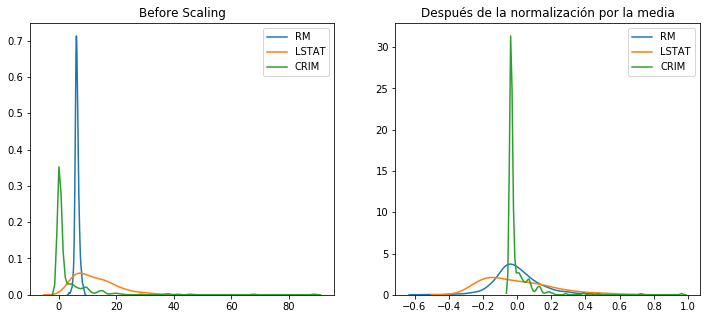

In [26]:
# comparemos la distribución de las variables 
# antes y despues del escalamiento
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización por la media')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Fíjate en las gráficas anteriores como la normalización centra las distribuciones alrededor de zero, preservando la distribución original pero limitando el rango de los valores entre -1 y 1.


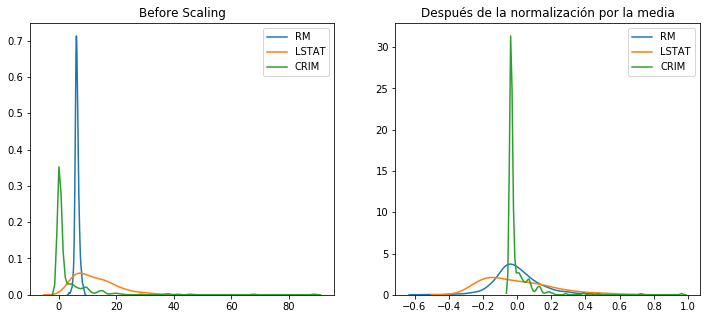

In [27]:
# comparemos la distribución de las variables 
# antes y despues del escalamiento
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización por la media')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Compara estas gráficas, con la que obtuvimos cuando usamos el escalamiento estándar en el notebook anterior para entender mejor como estos procedimiento no son idénticos y terminan normalizando las variables de manera diferente.


## Normalización por la media con Scikit-learn: solución alterna

Podemos implementar la normalización por la media usando Scikit-learn si combinamos dos transformadores. No es la implementación mas sencilla, pero si lo que quieres usar Scikit-learn, te presentamos una solución 

In [28]:
# usa el StandardScaler para remover la media
# pero sin dividir por la desviación estándar
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# usa el RobustScaler SIN remover la mediana pero
# normalizando por los valores max()-min()
# Es muy importante para esta implementación fijar
# el rango cuantil del 0 al 100,
# que representa los valores min y max
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# entrena los escaladores con el set de entrenamiento
# para que aprenda los parámetros
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transforma los sets de entrenamiento y prueba
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

In [29]:
# ahora transformemos los arreglos NumPy resultantes 
# en dataframes para el resto del demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


Observa como el resultado es idéntico a la celda 10, donde hicimos la normalización manualmente
